In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import MDS

In [2]:
# Load similarity matrix
X = np.load("similarity.npy")

In [3]:
# Optionally use a subset only
X = X[:1024 * 1, :1024 * 1]

In [4]:
X = X.astype(np.float32)

In [5]:
print(X.min(), X.max(), X.mean())

-inf 10.1484375 -inf


In [6]:
# Make symmetrical
X = np.add(X.transpose(), X)

# Clip to 0-1
X = np.absolute(X, out=X)
X = np.clip(X, 0, 1, out=X)

# Convert to dissimilarities
np.subtract(1, X)

# replace diagonals by -inf to prevent them being picked
np.fill_diagonal(X, 0)

In [7]:
# Cluster
mds = MDS(dissimilarity="precomputed", n_init=10, n_jobs=-1,
          normalized_stress="auto")
x2 = mds.fit_transform(X)

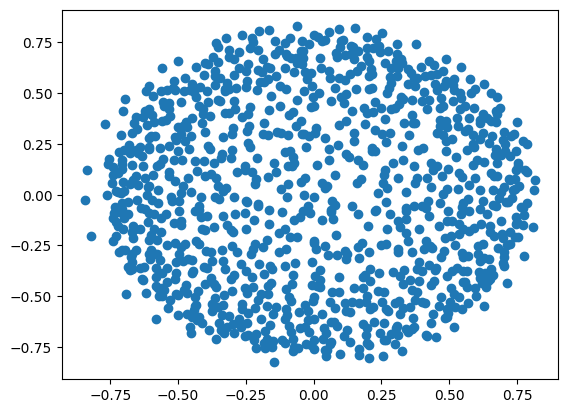

In [8]:
# Plot distances
plt.scatter(x2[:, 0], x2[:, 1])
plt.show()

In [9]:
# Cluster
mds = MDS(n_components=3, dissimilarity="precomputed", n_init=10, n_jobs=-1, normalized_stress="auto")
x3 = mds.fit_transform(X)

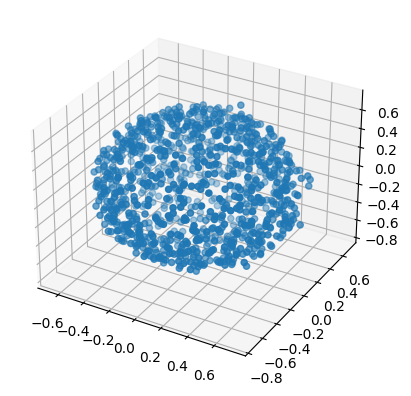

In [10]:
ax = plt.axes(projection="3d")

ax.scatter3D(x3[:, 0], x3[:, 1], x3[:, 2])